SELECT 
  value,
  gas_price
  receipt_gas_used
FROM
  `bigquery-public-data.crypto_ethereum.transactions` AS transaction

WHERE 
  value > 0

The Query results in producing 1518722449 results in bigquery console.
However the 'value' attribute is to be converted into an understandable form from wei to ether_value before data is to be extracted.

/*The value attribute is is not in an understandable format as it is represented in 'wei measure */
SELECT 
  value,
  gas_price
  receipt_gas_used
FROM
  `bigquery-public-data.crypto_ethereum.transactions` AS transaction

WHERE 
  value > 0;


/* 
    Transaction Fee = recipt_gas_used * gas_price
    https://cryptotesters.com/blog/ethereum-gas
*/

SELECT SUM(value/POWER(10,18)),DATE(block_timestamp) as date, SUM(gas_price*(receipt_gas_used/POWER(10,18)))/* Power() since One ether = wei (10^18) */
FROM `bigquery-public-data.crypto_ethereum.transactions`where value > 0 
GROUP BY date


/*We were able to achieve the same similar to  Allen's Query without using additional blocks table */

SELECT SUM(value/POWER(10,18)) AS ether_value,DATE(block_timestamp) as date, AVG(gas_price*(receipt_gas_used/POWER(10,18))) as avg_tx_fee
FROM `bigquery-public-data.crypto_ethereum.transactions`
WHERE DATE(block_timestamp) BETWEEN '2018-01-01' AND '2022-03-27'
GROUP BY date
ORDER BY date;




/*# Query by Allen Day, GooglCloud Developer Advocate (https://medium.com/@allenday)*/
SELECT 
  SUM(value/POWER(10,18)) AS sum_tx_ether,
  AVG(gas_price*(receipt_gas_used/POWER(10,18))) AS avg_tx_gas_cost,
  DATE(timestamp) AS tx_date
FROM
  `bigquery-public-data.crypto_ethereum.transactions` AS transactions,
  `bigquery-public-data.crypto_ethereum.blocks` AS blocks
WHERE TRUE
  AND transactions.block_number = blocks.number
  AND receipt_status = 1
  AND value > 0
GROUP BY tx_date
HAVING tx_date >= '2018-01-01' AND tx_date <= '2018-12-31'
ORDER BY tx_date

In [6]:
#trail using google drive csv file (1GB of rows) instead of local csv file (16k rows - 10 MB) for the query
import pandas as pd
URL = 'https://drive.google.com/file/d/18P7Yfo9DIrAWi8oKqFOWlcbnu7REyrwK/view?usp=sharing' #Google Drive File is set to Sharing mode.
path = 'https://drive.google.com/uc?export=download&id='+URL.split('/')[-2]
df = pd.read_csv(path)
df.head()

,ether_value,date,avg_tx_fee
0,8.253127e+06,2018-01-01,0.000845
1,1.399360e+07,2018-01-02,0.000913
2,1.398779e+07,2018-01-03,0.001002
3,2.024633e+07,2018-01-04,0.001099
4,1.853251e+07,2018-01-05,0.002502


Data Transformation

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns


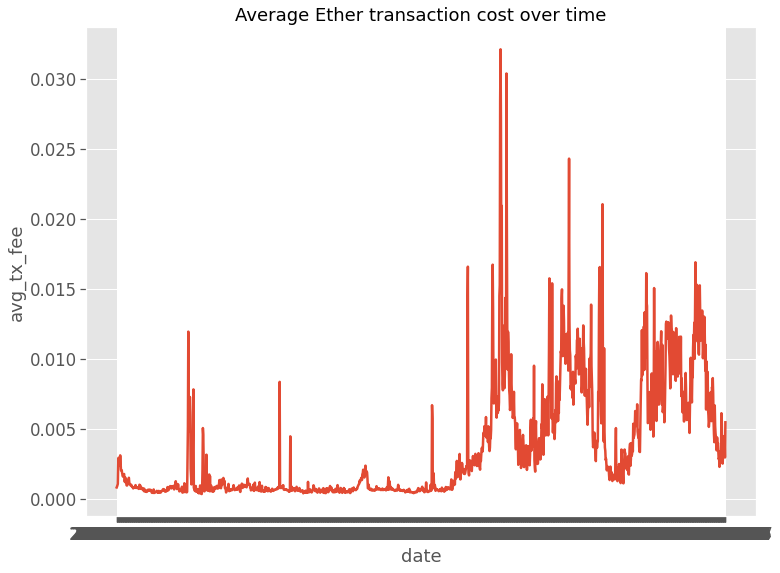

In [10]:
plt.style.use('ggplot')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

f, g = plt.subplots(figsize=(12, 9))
g = sns.lineplot(x="date", y="avg_tx_fee", data=df, palette="Blues_d")
plt.title("Average Ether transaction cost over time")
plt.show(g)